### Mini-Project- Stroke Prediction Model Challenge

**Goal:** Build and compare 5 different models to predict stroke risk, handling class imbalance appropriately

##### ============================================================================
##### SETTING UP THE ENVIRONMENT
##### ============================================================================

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries loaded successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries loaded successfully!
Pandas version: 2.2.3
NumPy version: 2.1.3


##### ============================================================================
##### LOADING AND INITIAL EXPLORATION
##### ============================================================================


## Loading the Stroke Prediction Dataset

**Dataset Source**: Kaggle - Stroke Prediction Dataset
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


In [3]:
# load the dataset

df = pd.read_csv(r"C:\Users\dell\Downloads\archive (1)\healthcare-dataset-stroke-data.csv")
     

In [4]:
# Display basic information
print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nFirst few rows:")
df.head()


DATASET OVERVIEW

Dataset Shape: 5110 rows × 12 columns

First few rows:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
print("\n" + "-"*80)
print("COLUMN INFORMATION")
print("-"*80)
df.info()


--------------------------------------------------------------------------------
COLUMN INFORMATION
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)

In [6]:
print("\n" + "-"*80)
print("STATISTICAL SUMMARY")
print("-"*80)
df.describe()


--------------------------------------------------------------------------------
STATISTICAL SUMMARY
--------------------------------------------------------------------------------


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##### ============================================================================
####  UNDERSTANDING YOUR DATA - DETAILED EXPLORATION
#### ============================================================================

"""
## Feature Understanding: The Foundation of Good ML

Before any feature engineering, we must deeply understand each variable:
- What does it measure?
- What is its distribution?
- How does it relate to the target?
- What are potential issues (missing, outliers, etc.)?
"""

In [7]:
# Check data types
print("\n" + "="*80)
print("DATA TYPES AND FEATURE CATEGORIZATION")
print("="*80)

print("\nNumerical Features:")
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'id' in numerical_features:
    numerical_features.remove('id')
if 'stroke' in numerical_features:
    numerical_features.remove('stroke')
print(numerical_features)


DATA TYPES AND FEATURE CATEGORIZATION

Numerical Features:
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


In [8]:
print("\nCategorical Features:")
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)


Categorical Features:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [9]:
print("\nTarget Variable:")
print("stroke (binary: 0 = No stroke, 1 = Stroke)")


Target Variable:
stroke (binary: 0 = No stroke, 1 = Stroke)


In [10]:
# Check for missing values
print("\n" + "="*80)
print("MISSING DATA ANALYSIS")
print("="*80)
missing_data = df.isnull().sum()
missing_percent = 100 * missing_data / len(df)
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)



MISSING DATA ANALYSIS


In [11]:
missing_df 

,Missing_Count,Percentage
bmi,201,3.933464


In [12]:
if len(missing_df) > 0:
    print("\n⚠ Features with missing values:")
    print(missing_df)
else:
    print("\n✓ No missing values detected!")


⚠ Features with missing values:
     Missing_Count  Percentage
bmi            201    3.933464


In [13]:
# Check target variable distribution
print("\n" + "="*80)
print("TARGET VARIABLE DISTRIBUTION")
print("="*80)
target_counts = df['stroke'].value_counts()
target_percent = 100 * df['stroke'].value_counts(normalize=True)

print("\nStroke Occurrence:")
print(f"  No Stroke (0): {target_counts[0]:,} ({target_percent[0]:.2f}%)")
print(f"  Stroke (1):    {target_counts[1]:,} ({target_percent[1]:.2f}%)")
print(f"\n  Imbalance Ratio: {target_counts[0]/target_counts[1]:.1f}:1")


TARGET VARIABLE DISTRIBUTION

Stroke Occurrence:
  No Stroke (0): 4,861 (95.13%)
  Stroke (1):    249 (4.87%)

  Imbalance Ratio: 19.5:1


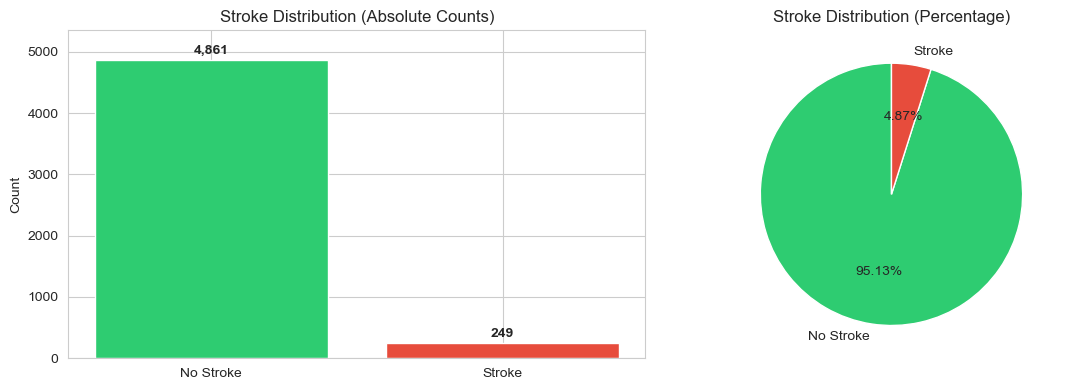

In [14]:
# Visualize target distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(['No Stroke', 'Stroke'], target_counts.values, color=['#2ecc71', '#e74c3c'])
ax[0].set_ylabel('Count')
ax[0].set_title('Stroke Distribution (Absolute Counts)')
ax[0].set_ylim(0, max(target_counts.values) * 1.1)
for i, v in enumerate(target_counts.values):
    ax[0].text(i, v + max(target_counts.values)*0.02, f'{v:,}', ha='center', fontweight='bold')

ax[1].pie(target_counts.values, labels=['No Stroke', 'Stroke'], 
          autopct='%1.2f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
ax[1].set_title('Stroke Distribution (Percentage)')

plt.tight_layout()
plt.show()

##### ============================================================================
##### FEATURE ENGINEERING - THE HEART OF ML SUCCESS
##### ============================================================================


## What is Feature Engineering?

Feature engineering is the process of creating new features or transforming existing ones
to better represent patterns in the data that help the model make accurate predictions.

### Why is Feature Engineering Critical in Healthcare?

1. **Domain Knowledge Integration**: Incorporate clinical insights (e.g., BMI categories)
2. **Improved Model Performance**: Better features = better predictions
3. **Interpretability**: Clinically meaningful features are easier to explain
4. **Handle Complex Relationships**: Capture non-linear patterns
5. **Deal with Data Issues**: Missing values, outliers, scaling differences

### Feature Engineering Techniques We'll Cover:

1. Creating indicator/flag variables
2. Binning continuous variables into categories
3. Interaction features
4. Handling missing data strategically
5. Encoding categorical variables
6. Scaling/normalization
7. Deriving domain-specific features

In [15]:
# Create a copy for feature engineering
df_engineered = df.copy()

print("\n" + "="*80)
print("FEATURE ENGINEERING IN ACTION")
print("="*80)

#-----------------------------------------------
# Technique 1: Creating Binary Flags
# -----------------------------------------------
print("\nCREATING BINARY FLAGS")
print("-" * 60)


FEATURE ENGINEERING IN ACTION

CREATING BINARY FLAGS
------------------------------------------------------------


Binary flags are simple 0/1 indicators that signal the presence or absence of a condition.
They're powerful because:
- Easy for models to learn from
- Clinically interpretable
- Can capture complex conditions simply

In [16]:
# Flag for elderly patients (age >= 65)
df_engineered['is_elderly'] = (df_engineered['age'] >= 65).astype(int)

# Flag for high glucose (prediabetic/diabetic range: >= 126 mg/dL fasting)
df_engineered['high_glucose'] = (df_engineered['avg_glucose_level'] >= 126).astype(int)

# Flag for obesity (BMI >= 30)
df_engineered['is_obese'] = (df_engineered['bmi'] >= 30).astype(int)

# Combined comorbidity flag (has hypertension OR heart disease)
df_engineered['has_comorbidity'] = ((df_engineered['hypertension'] == 1) | 
                                     (df_engineered['heart_disease'] == 1)).astype(int)

print("✓ Created binary flags:")
print("  - is_elderly: Age >= 65")
print("  - high_glucose: Avg glucose >= 126 mg/dL")
print("  - is_obese: BMI >= 30")
print("  - has_comorbidity: Hypertension OR heart disease")

✓ Created binary flags:
  - is_elderly: Age >= 65
  - high_glucose: Avg glucose >= 126 mg/dL
  - is_obese: BMI >= 30
  - has_comorbidity: Hypertension OR heart disease


In [17]:
# Show examples
print("\nExample rows with new flags:")
df_engineered[['age', 'is_elderly', 'avg_glucose_level', 'high_glucose', 
                     'bmi', 'is_obese', 'has_comorbidity']].head(10)


Example rows with new flags:


,age,is_elderly,avg_glucose_level,high_glucose,bmi,is_obese,has_comorbidity
0,67.0,1,228.69,1,36.6,1,1
1,61.0,0,202.21,1,NaN,0,0
2,80.0,1,105.92,0,32.5,1,1
3,49.0,0,171.23,1,34.4,1,0
4,79.0,1,174.12,1,24.0,0,1
5,81.0,1,186.21,1,29.0,0,0
6,74.0,1,70.09,0,27.4,0,1
7,69.0,1,94.39,0,22.8,0,0
8,59.0,0,76.15,0,NaN,0,0
9,78.0,1,58.57,0,24.2,0,0


##### -----------------------------------------------
##### Technique 2: Binning Continuous Variables
##### -----------------------------------------------

In [18]:
print("\n\nBINNING CONTINUOUS VARIABLES")
print("-" * 60)



BINNING CONTINUOUS VARIABLES
------------------------------------------------------------


Binning converts continuous variables into categorical groups.

Benefits:
- Captures non-linear relationships
- Reduces noise and outliers
- Creates clinically meaningful categories
- More robust to variations within ranges

In [19]:
# Age groups (clinical age brackets)
df_engineered['age_group'] = pd.cut(df_engineered['age'], 
                                     bins=[0, 18, 35, 50, 65, 100],
                                     labels=['Child/Teen', 'Young Adult', 'Middle Age', 'Senior', 'Elderly'],
                                     right=False)

# BMI categories (WHO classification)
df_engineered['bmi_category'] = pd.cut(df_engineered['bmi'], 
                                        bins=[0, 18.5, 25, 30, 40, 100],
                                        labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese'],
                                        right=False)

# Glucose level categories
df_engineered['glucose_category'] = pd.cut(df_engineered['avg_glucose_level'],
                                            bins=[0, 100, 126, 200, 1000],
                                            labels=['Normal', 'Prediabetic', 'Diabetic', 'Very High'],
                                            right=False)

print("✓ Created categorical bins:")
print("  - age_group: 5 clinical age brackets")
print("  - bmi_category: WHO BMI classification")
print("  - glucose_category: Clinical glucose ranges")

✓ Created categorical bins:
  - age_group: 5 clinical age brackets
  - bmi_category: WHO BMI classification
  - glucose_category: Clinical glucose ranges


In [20]:
print("\nAge group distribution:")
df_engineered['age_group'].value_counts().sort_index()


Age group distribution:


age_group
Child/Teen      856
Young Adult     989
Middle Age     1055
Senior         1183
Elderly        1027
Name: count, dtype: int64

In [21]:
print("\nBMI category distribution:")
df_engineered['bmi_category'].value_counts()


BMI category distribution:


bmi_category
Obese             1506
Overweight        1409
Normal            1243
Severely Obese     414
Underweight        337
Name: count, dtype: int64

#### -----------------------------------------------
#### Technique 3: Interaction Features
#### -----------------------------------------------

In [22]:
print("\n\nCREATING INTERACTION FEATURES")
print("-" * 60)



CREATING INTERACTION FEATURES
------------------------------------------------------------


Interaction features capture the combined effect of multiple variables.
In healthcare, risk often depends on combinations of factors.


Example: Being elderly + having heart disease is much higher risk than either alone

In [23]:
# High-risk combination: elderly with comorbidities
df_engineered['elderly_with_comorbidity'] = (
    (df_engineered['is_elderly'] == 1) & 
    (df_engineered['has_comorbidity'] == 1)
).astype(int)

# Multiple risk factors count
df_engineered['risk_factor_count'] = (
    df_engineered['hypertension'] + 
    df_engineered['heart_disease'] + 
    df_engineered['is_obese'] + 
    df_engineered['high_glucose']
)

# Smoking + hypertension (compounding cardiovascular risk)
df_engineered['smoker_with_hypertension'] = (
    ((df_engineered['smoking_status'] == 'smokes') | 
     (df_engineered['smoking_status'] == 'formerly smoked')) & 
    (df_engineered['hypertension'] == 1)
).astype(int)

print("✓ Created interaction features:")
print("  - elderly_with_comorbidity: Age 65+ AND (hypertension OR heart disease)")
print("  - risk_factor_count: Total number of major risk factors (0-4)")
print("  - smoker_with_hypertension: Smoking history AND hypertension")

✓ Created interaction features:
  - elderly_with_comorbidity: Age 65+ AND (hypertension OR heart disease)
  - risk_factor_count: Total number of major risk factors (0-4)
  - smoker_with_hypertension: Smoking history AND hypertension


In [24]:
print("\nRisk factor count distribution:")
df_engineered['risk_factor_count'].value_counts().sort_index()


Risk factor count distribution:


risk_factor_count
0    2460
1    1831
2     629
3     174
4      16
Name: count, dtype: int64

##### -----------------------------------------------
#### Technique 4: Handling Missing Data
#### -----------------------------------------------

In [25]:
print("\n\nHANDLING MISSING DATA STRATEGICALLY")
print("-" * 60)



HANDLING MISSING DATA STRATEGICALLY
------------------------------------------------------------


Missing data is common in healthcare datasets. Strategies depend on:
- How much is missing
- Why it's missing (random vs. systematic)
- The variable's importance
- Clinical context

Common approaches:
1. Mean/Median imputation (for MCAR - Missing Completely At Random)
2. Mode imputation (for categorical)
3. Create 'missing' indicator (if missingness is informative)
4. Drop rows (if very few missing)
5. Advanced: KNN imputation, iterative imputation

In [26]:
# Check BMI missingness
bmi_missing_pct = 100 * df_engineered['bmi'].isnull().sum() / len(df_engineered)
print(f"\nBMI missing: {df_engineered['bmi'].isnull().sum()} rows ({bmi_missing_pct:.2f}%)")

if df_engineered['bmi'].isnull().sum() > 0:
    # Create flag for missing BMI (missingness might be informative)
    df_engineered['bmi_missing'] = df_engineered['bmi'].isnull().astype(int)
    
    # Impute with median (robust to outliers)
    bmi_median = df_engineered['bmi'].median()
    df_engineered['bmi_imputed'] = df_engineered['bmi'].fillna(bmi_median)
    
    print(f"✓ Created 'bmi_missing' flag")
    print(f"✓ Imputed missing BMI values with median: {bmi_median:.2f}")
    
    # Update derived features with imputed values
    df_engineered['is_obese'] = (df_engineered['bmi_imputed'] >= 30).astype(int)
    df_engineered['bmi_category'] = pd.cut(df_engineered['bmi_imputed'], 
                                            bins=[0, 18.5, 25, 30, 40, 100],
                                            labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese'],
                                            right=False)
    
    print("✓ Updated derived features (is_obese, bmi_category) using imputed values")


BMI missing: 201 rows (3.93%)
✓ Created 'bmi_missing' flag
✓ Imputed missing BMI values with median: 28.10
✓ Updated derived features (is_obese, bmi_category) using imputed values


#### -----------------------------------------------
#### Technique 5: Encoding Categorical Variables
#### -----------------------------------------------

In [27]:
print("\n\nENCODING CATEGORICAL VARIABLES")
print("-" * 60)



ENCODING CATEGORICAL VARIABLES
------------------------------------------------------------


ML algorithms need numerical input. We must convert categorical variables.

Two main approaches:
1. Label Encoding: For ordinal data (ordered categories)
   Example: Education level (High School=0, Bachelor=1, Master=2, PhD=3)

2. One-Hot Encoding: For nominal data (no inherent order)
   Example: Work type → Creates binary columns for each category
   
Healthcare Note: Be careful with categories. "Unknown" might be informative!

In [28]:
# Binary categorical variables (can use simple mapping)
df_engineered['gender_encoded'] = df_engineered['gender'].map({
    'Male': 1, 
    'Female': 0, 
    'Other': 2
})

df_engineered['ever_married_encoded'] = df_engineered['ever_married'].map({
    'Yes': 1, 
    'No': 0
})

df_engineered['residence_encoded'] = df_engineered['Residence_type'].map({
    'Urban': 1, 
    'Rural': 0
})

print("✓ Label encoded binary categorical variables:")
print("  - gender: Male=1, Female=0, Other=2")
print("  - ever_married: Yes=1, No=0")
print("  - Residence_type: Urban=1, Rural=0")

✓ Label encoded binary categorical variables:
  - gender: Male=1, Female=0, Other=2
  - ever_married: Yes=1, No=0
  - Residence_type: Urban=1, Rural=0


In [29]:
df_engineered['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [30]:
df_engineered['work_type']

0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 5110, dtype: object

In [31]:
# One-hot encoding for multi-category variables
# Work type
work_type_dummies = pd.get_dummies(df_engineered['work_type'], prefix='work', drop_first=True)
df_engineered = pd.concat([df_engineered, work_type_dummies], axis=1)

# Smoking status
smoking_dummies = pd.get_dummies(df_engineered['smoking_status'], prefix='smoking', drop_first=True)
df_engineered = pd.concat([df_engineered, smoking_dummies], axis=1)

print("\n✓ One-hot encoded multi-category variables:")
print(f"  - work_type: Created {len(work_type_dummies.columns)} binary columns")
print(f"  - smoking_status: Created {len(smoking_dummies.columns)} binary columns")
print("\nNote: Using drop_first=True to avoid multicollinearity (dummy variable trap)")


✓ One-hot encoded multi-category variables:
  - work_type: Created 4 binary columns
  - smoking_status: Created 3 binary columns

Note: Using drop_first=True to avoid multicollinearity (dummy variable trap)


#### -----------------------------------------------
#### Technique 6: Feature Scaling/Normalization
#### -----------------------------------------------

In [32]:
print("\n\nFEATURE SCALING")
print("-" * 60)



FEATURE SCALING
------------------------------------------------------------


Many ML algorithms (KNN, SVM, Neural Networks, Logistic Regression) are sensitive to 
feature scales. Features with larger ranges can dominate distance calculations.

Two common approaches:
1. Standardization (Z-score normalization): Mean=0, Std=1
   - Use when features follow normal distribution
   - Not bounded
   - Formula: (x - mean) / std

2. Min-Max Scaling: Scale to [0, 1] range
   - Use when you need bounded range
   - Sensitive to outliers
   - Formula: (x - min) / (max - min)

Healthcare Note: Always fit scaler on training data only, then transform test data!

In [33]:
# Select numerical features for scaling
features_to_scale = ['age', 'avg_glucose_level', 'bmi_imputed']

# Standardization
scaler = StandardScaler()
df_engineered[['age_scaled', 'glucose_scaled', 'bmi_scaled']] = scaler.fit_transform(
    df_engineered[features_to_scale]
)

print("✓ Applied standardization (Z-score) to continuous features:")
print("  - age → age_scaled")
print("  - avg_glucose_level → glucose_scaled")
print("  - bmi_imputed → bmi_scaled")

✓ Applied standardization (Z-score) to continuous features:
  - age → age_scaled
  - avg_glucose_level → glucose_scaled
  - bmi_imputed → bmi_scaled


In [34]:
print("\nBefore and after scaling example:")
comparison = df_engineered[['age', 'age_scaled', 'avg_glucose_level', 
                            'glucose_scaled', 'bmi_imputed', 'bmi_scaled']].head()
comparison


Before and after scaling example:


,age,age_scaled,avg_glucose_level,glucose_scaled,bmi_imputed,bmi_scaled
0,67.0,1.051434,228.69,2.706375,36.6,1.005086
1,61.0,0.786070,202.21,2.121559,28.1,-0.098981
2,80.0,1.626390,105.92,-0.005028,32.5,0.472536
3,49.0,0.255342,171.23,1.437358,34.4,0.719327
4,79.0,1.582163,174.12,1.501184,24.0,-0.631531


##### -----------------------------------------------
##### Technique 7: Domain-Specific Features
##### -----------------------------------------------

In [35]:
print("\n\nDOMAIN-SPECIFIC HEALTHCARE FEATURES")
print("-" * 60)



DOMAIN-SPECIFIC HEALTHCARE FEATURES
------------------------------------------------------------


This is where your healthcare knowledge shines!

Create features based on clinical understanding and research.

In [36]:
# Cardiovascular risk score (simplified)
# Combines multiple risk factors with clinical relevance
df_engineered['cv_risk_score'] = (
    (df_engineered['age'] / 10) +  # Age contribution
    (df_engineered['hypertension'] * 2) +  # Hypertension doubles risk
    (df_engineered['heart_disease'] * 3) +  # Heart disease triples risk
    (df_engineered['is_obese'] * 1.5) +  # Obesity adds significant risk
    ((df_engineered['smoking_status'].isin(['smokes', 'formerly smoked'])).astype(int) * 2)  # Smoking doubles
)

# Metabolic syndrome indicators (simplified criteria)
# Typically: obesity + high glucose + hypertension
df_engineered['metabolic_syndrome_indicator'] = (
    (df_engineered['is_obese'] == 1) & 
    (df_engineered['high_glucose'] == 1) & 
    (df_engineered['hypertension'] == 1)
).astype(int)

print("✓ Created domain-specific features:")
print("  - cv_risk_score: Composite cardiovascular risk score")
print("  - metabolic_syndrome_indicator: Simplified metabolic syndrome flag")

print("\nCardiovascular risk score distribution:")
print(df_engineered['cv_risk_score'].describe())


✓ Created domain-specific features:
  - cv_risk_score: Composite cardiovascular risk score
  - metabolic_syndrome_indicator: Simplified metabolic syndrome flag

Cardiovascular risk score distribution:
count    5110.000000
mean        5.898395
std         3.350029
min         0.008000
25%         3.400000
50%         6.000000
75%         8.200000
max        16.500000
Name: cv_risk_score, dtype: float64


##### ============================================================================
##### PART 7: FEATURE IMPORTANCE PREVIEW
##### ============================================================================

In [37]:
print("\n" + "="*80)
print("FEATURE RELATIONSHIPS WITH TARGET")
print("="*80)


FEATURE RELATIONSHIPS WITH TARGET


Before modeling, let's examine how our engineered features relate to stroke occurrence.
This helps us:
1. Validate our feature engineering
2. Identify potentially important predictors
3. Spot issues or surprises
4. Build intuition for modeling


Top features correlated with stroke:
is_elderly                      0.247136
age                             0.245257
cv_risk_score                   0.233832
has_comorbidity                 0.171871
risk_factor_count               0.144355
heart_disease                   0.134914
avg_glucose_level               0.131945
hypertension                    0.127904
high_glucose                    0.120463
metabolic_syndrome_indicator    0.076593
Name: stroke, dtype: float64


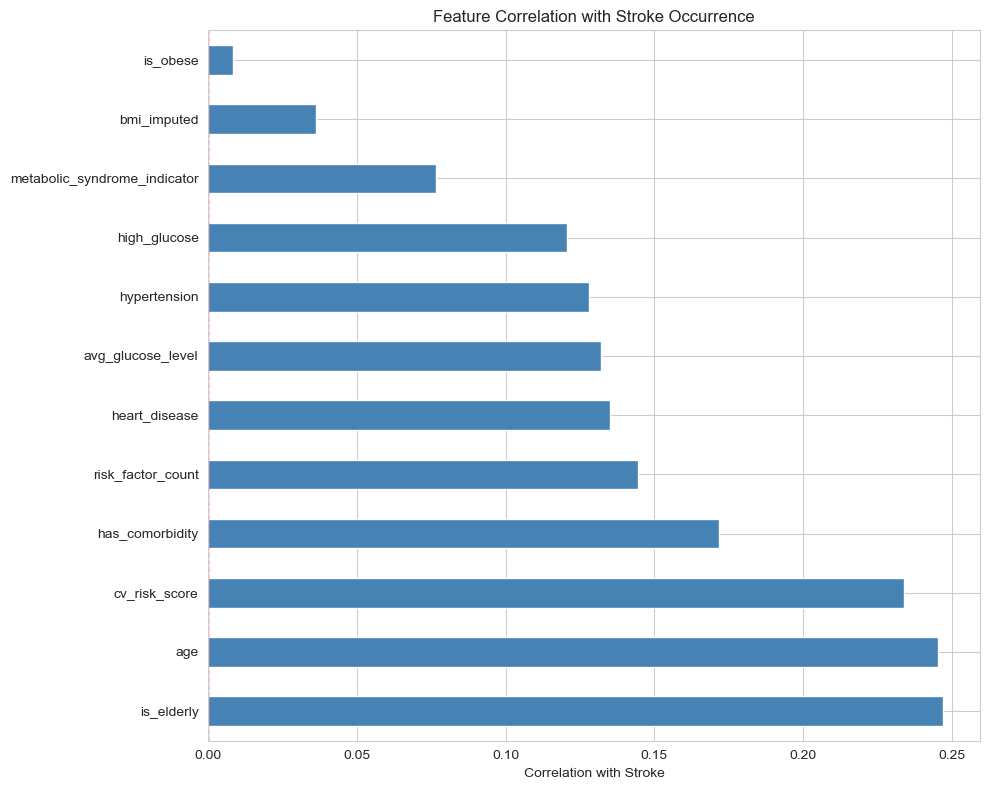

In [38]:
# Select key features for analysis
analysis_features = [
    'age', 'is_elderly', 'hypertension', 'heart_disease', 
    'has_comorbidity', 'avg_glucose_level', 'high_glucose',
    'bmi_imputed', 'is_obese', 'risk_factor_count', 
    'cv_risk_score', 'metabolic_syndrome_indicator'
]

# Calculate correlation with stroke
correlations = df_engineered[analysis_features + ['stroke']].corr()['stroke'].drop('stroke').sort_values(ascending=False)

print("\nTop features correlated with stroke:")
print(correlations.head(10))

# Visualize feature importance through correlation
plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color='steelblue')
plt.xlabel('Correlation with Stroke')
plt.title('Feature Correlation with Stroke Occurrence')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [39]:
# Compare stroke rates across categorical features
print("\n" + "-"*80)
print("Stroke rates by category:")
print("-"*80)

# Age group
stroke_by_age = df_engineered.groupby('age_group')['stroke'].agg(['mean', 'count'])
stroke_by_age.columns = ['Stroke_Rate', 'Count']
stroke_by_age['Stroke_Rate'] = stroke_by_age['Stroke_Rate'] * 100
print("\nBy Age Group:")
print(stroke_by_age)

# Comorbidity
stroke_by_comorbidity = df_engineered.groupby('has_comorbidity')['stroke'].mean() * 100
print("\nBy Comorbidity Status:")
print("No comorbidity: {:.2f}%".format(stroke_by_comorbidity[0]))
print("Has comorbidity: {:.2f}%".format(stroke_by_comorbidity[1]))


--------------------------------------------------------------------------------
Stroke rates by category:
--------------------------------------------------------------------------------

By Age Group:
             Stroke_Rate  Count
age_group                      
Child/Teen      0.233645    856
Young Adult     0.101112    989
Middle Age      1.611374   1055
Senior          5.917160   1183
Elderly        15.481986   1027

By Comorbidity Status:
No comorbidity: 3.39%
Has comorbidity: 14.08%


In [40]:
# Risk factor count
stroke_by_risk_count = df_engineered.groupby('risk_factor_count')['stroke'].mean() * 100
print("\nBy Number of Risk Factors:")
for i, rate in stroke_by_risk_count.items():
    print(f"{i} risk factors: {rate:.2f}%")


By Number of Risk Factors:
0 risk factors: 2.97%
1 risk factors: 4.31%
2 risk factors: 10.17%
3 risk factors: 16.09%
4 risk factors: 31.25%


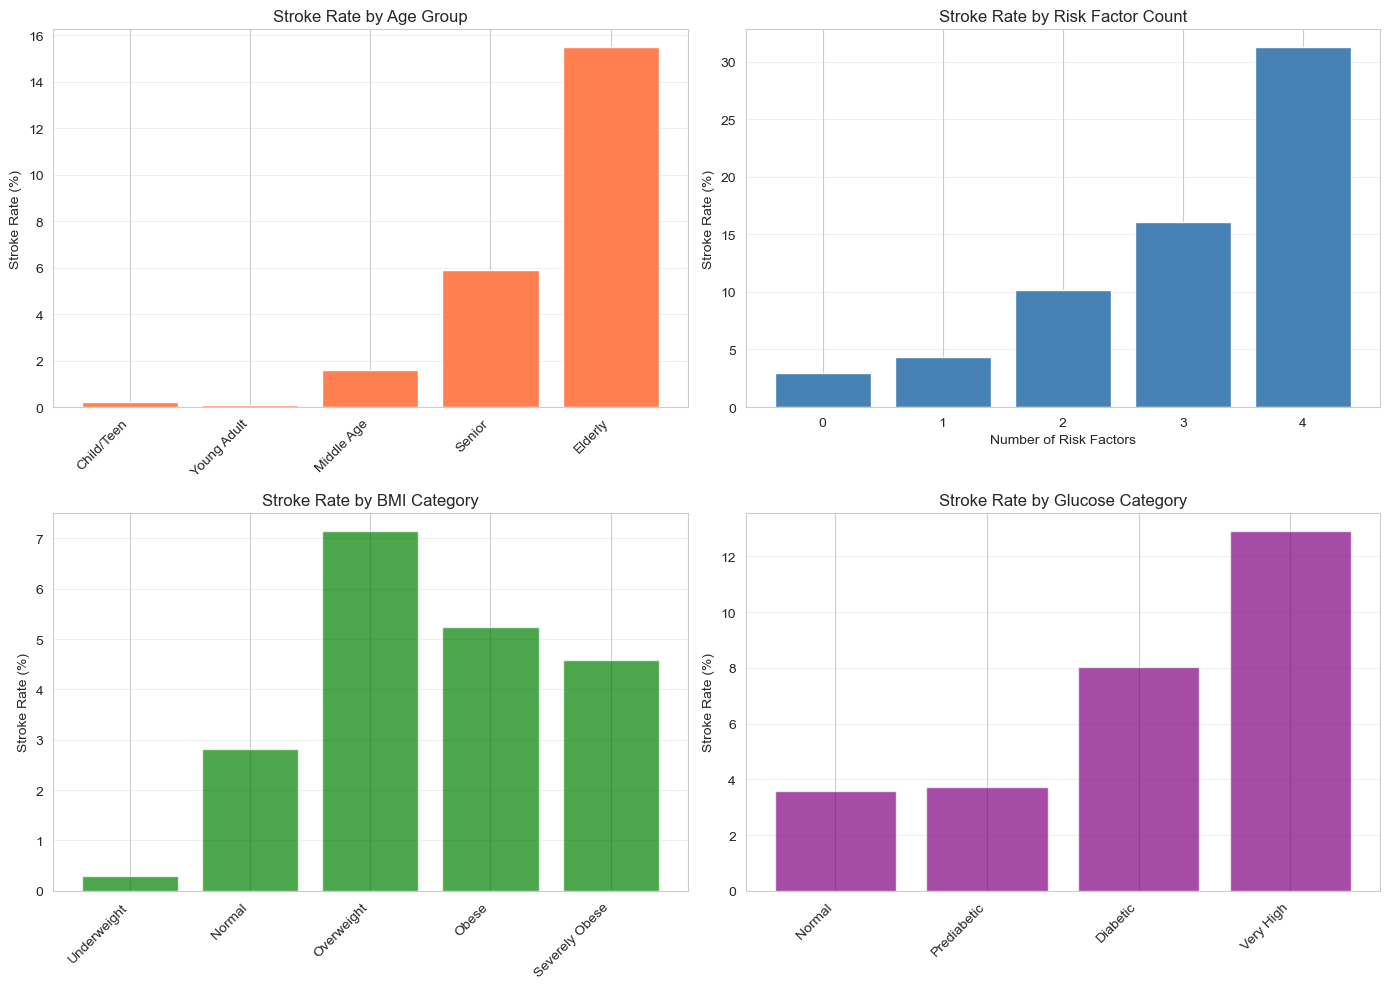

In [41]:
# Visualization: Stroke rate by key categories
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age group
stroke_by_age_plot = df_engineered.groupby('age_group')['stroke'].mean() * 100
axes[0, 0].bar(range(len(stroke_by_age_plot)), stroke_by_age_plot.values, color='coral')
axes[0, 0].set_xticks(range(len(stroke_by_age_plot)))
axes[0, 0].set_xticklabels(stroke_by_age_plot.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('Stroke Rate (%)')
axes[0, 0].set_title('Stroke Rate by Age Group')
axes[0, 0].grid(axis='y', alpha=0.3)

# Risk factor count
axes[0, 1].bar(stroke_by_risk_count.index, stroke_by_risk_count.values, color='steelblue')
axes[0, 1].set_xlabel('Number of Risk Factors')
axes[0, 1].set_ylabel('Stroke Rate (%)')
axes[0, 1].set_title('Stroke Rate by Risk Factor Count')
axes[0, 1].grid(axis='y', alpha=0.3)

# BMI category
stroke_by_bmi = df_engineered.groupby('bmi_category')['stroke'].mean() * 100
axes[1, 0].bar(range(len(stroke_by_bmi)), stroke_by_bmi.values, color='green', alpha=0.7)
axes[1, 0].set_xticks(range(len(stroke_by_bmi)))
axes[1, 0].set_xticklabels(stroke_by_bmi.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Stroke Rate (%)')
axes[1, 0].set_title('Stroke Rate by BMI Category')
axes[1, 0].grid(axis='y', alpha=0.3)

# Glucose category
stroke_by_glucose = df_engineered.groupby('glucose_category')['stroke'].mean() * 100
axes[1, 1].bar(range(len(stroke_by_glucose)), stroke_by_glucose.values, color='purple', alpha=0.7)
axes[1, 1].set_xticks(range(len(stroke_by_glucose)))
axes[1, 1].set_xticklabels(stroke_by_glucose.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Stroke Rate (%)')
axes[1, 1].set_title('Stroke Rate by Glucose Category')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

##### ============================================================================
##### PART 8: PREPARING THE FINAL FEATURE SET
##### ============================================================================

In [42]:
print("\n" + "="*80)
print("PREPARING FINAL FEATURE SET FOR MODELING")
print("="*80)


PREPARING FINAL FEATURE SET FOR MODELING


Now that we've engineered our features, we need to:
1. Select which features to include in our model
2. Ensure all features are in the correct format
3. Handle any remaining data quality issues
4. Split into training and testing sets

In [43]:
# Define our final feature set
final_features = [
    # Original features (encoded)
    'age',
    'gender_encoded',
    'hypertension',
    'heart_disease',
    'ever_married_encoded',
    'residence_encoded',
    'avg_glucose_level',
    'bmi_imputed',
    
    # Engineered binary flags
    'is_elderly',
    'high_glucose',
    'is_obese',
    'has_comorbidity',
    'elderly_with_comorbidity',
    'smoker_with_hypertension',
    'metabolic_syndrome_indicator',
    'bmi_missing',
    
    # Engineered numeric features
    'risk_factor_count',
    'cv_risk_score',
    
    # One-hot encoded features
    'work_Govt_job',
    'work_Never_worked',
    'work_Private',
    'work_Self-employed',
    'smoking_formerly smoked',
    'smoking_never smoked',
    'smoking_smokes'
]

In [44]:
# Verify all features exist
missing_features = [f for f in final_features if f not in df_engineered.columns]
if missing_features:
    print(f"Warning: These features are missing: {missing_features}")
    final_features = [f for f in final_features if f in df_engineered.columns]

print(f"\n✓ Final feature set contains {len(final_features)} features")
print("\nFeature categories:")
print(f"  - Original encoded features: 8")
print(f"  - Engineered flags: 8")
print(f"  - Engineered numeric: 2")
print(f"  - One-hot encoded: {len([f for f in final_features if 'work_' in f or 'smoking_' in f])}")


✓ Final feature set contains 24 features

Feature categories:
  - Original encoded features: 8
  - Engineered flags: 8
  - Engineered numeric: 2
  - One-hot encoded: 6


In [45]:
# Create final dataset
X = df_engineered[final_features].copy()
y = df_engineered['stroke'].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check for any remaining missing values
remaining_missing = X.isnull().sum().sum()
if remaining_missing > 0:
    print(f"\n⚠ Warning: {remaining_missing} missing values remain")
    print("\nMissing values by feature:")
    print(X.isnull().sum()[X.isnull().sum() > 0])
else:
    print("\n✓ No missing values in final feature set!")


Feature matrix shape: (5110, 24)
Target vector shape: (5110,)

✓ No missing values in final feature set!


In [46]:
# Check for infinite values
inf_values = np.isinf(X.select_dtypes(include=[np.number])).sum().sum()
if inf_values > 0:
    print(f"\n⚠ Warning: {inf_values} infinite values detected")
else:
    print("✓ No infinite values detected!")

✓ No infinite values detected!


##### ============================================================================
#### PART 9: TRAIN-TEST SPLIT
##### ============================================================================

In [47]:
print("\n" + "="*80)
print("SPLITTING DATA FOR MODEL TRAINING")
print("="*80)


SPLITTING DATA FOR MODEL TRAINING


Why split data?
- Training set: Used to train the model
- Test set: Used to evaluate model performance on unseen data
- Prevents overfitting and gives realistic performance estimates

Best practices:
- Use stratified split for imbalanced data (preserves class distribution)
- Typical split: 70-30 or 80-20
- Random state for reproducibility

In [48]:
# Stratified split (maintains class imbalance in both sets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\n✓ Data split successfully!")
print(f"\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Verify stratification worked
print("\nClass distribution in splits:")
print(f"\nOriginal data:")
print(f"  No Stroke: {(y==0).sum()} ({(y==0).mean()*100:.2f}%)")
print(f"  Stroke: {(y==1).sum()} ({(y==1).mean()*100:.2f}%)")

print(f"\nTraining set:")
print(f"  No Stroke: {(y_train==0).sum()} ({(y_train==0).mean()*100:.2f}%)")
print(f"  Stroke: {(y_train==1).sum()} ({(y_train==1).mean()*100:.2f}%)")

print(f"\nTest set:")
print(f"  No Stroke: {(y_test==0).sum()} ({(y_test==0).mean()*100:.2f}%)")
print(f"  Stroke: {(y_test==1).sum()} ({(y_test==1).mean()*100:.2f}%)")


✓ Data split successfully!

Training set: 4088 samples (80.0%)
Test set: 1022 samples (20.0%)

Class distribution in splits:

Original data:
  No Stroke: 4861 (95.13%)
  Stroke: 249 (4.87%)

Training set:
  No Stroke: 3889 (95.13%)
  Stroke: 199 (4.87%)

Test set:
  No Stroke: 972 (95.11%)
  Stroke: 50 (4.89%)


##### ============================================================================
##### PART 10: FEATURE SCALING ON SPLIT DATA
##### ============================================================================

In [49]:
print("\n" + "="*80)
print("APPLYING FEATURE SCALING TO SPLIT DATA")
print("="*80)


APPLYING FEATURE SCALING TO SPLIT DATA


CRITICAL: Always fit scaler on training data ONLY, then transform both sets!

Why?
- Prevents data leakage from test set
- Ensures model sees truly unseen data
- Mimics real-world deployment scenario

This is one of the most common mistakes in ML!

In [50]:
# Identify features that need scaling (continuous features)
features_needing_scaling = ['age', 'avg_glucose_level', 'bmi_imputed', 'cv_risk_score']
features_needing_scaling = [f for f in features_needing_scaling if f in X_train.columns]

# Create copies to preserve original
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit scaler on training data ONLY
scaler_final = StandardScaler()
X_train_scaled[features_needing_scaling] = scaler_final.fit_transform(X_train[features_needing_scaling])

# Transform test data using training data statistics
X_test_scaled[features_needing_scaling] = scaler_final.transform(X_test[features_needing_scaling])

print(f"✓ Scaled {len(features_needing_scaling)} continuous features")
print(f"  Features scaled: {', '.join(features_needing_scaling)}")

print("\nScaling statistics (learned from training data):")
for feature, mean, std in zip(features_needing_scaling, scaler_final.mean_, scaler_final.scale_):
    print(f"  {feature}: mean={mean:.2f}, std={std:.2f}")

✓ Scaled 4 continuous features
  Features scaled: age, avg_glucose_level, bmi_imputed, cv_risk_score

Scaling statistics (learned from training data):
  age: mean=43.35, std=22.59
  avg_glucose_level: mean=106.32, std=45.25
  bmi_imputed: mean=28.89, std=7.76
  cv_risk_score: mean=5.91, std=3.34


### Model Training

#### Model 1: Logistic regression

In [51]:
 from sklearn.linear_model import LogisticRegression
 from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
 # Train with class_weight='balanced' to handle imbalance
 
 logreg = LogisticRegression(class_weight='balanced', max_iter=1000,
 random_state=42)
 logreg.fit(X_train_scaled, y_train)
 # Predictions
 y_pred_lr = logreg.predict(X_test_scaled)
 y_pred_proba_lr = logreg.predict_proba(X_test_scaled)[:, 1]
 # Evaluate
 print("="*60)
 print("MODEL 1: LOGISTIC REGRESSION")
 print("="*60)
 print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
 print(f"Recall:{recall_score(y_test, y_pred_lr):.4f} ")
 print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
 print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
 print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
 print("\nConfusion Matrix:")
 print(confusion_matrix(y_test, y_pred_lr))
 

MODEL 1: LOGISTIC REGRESSION
Accuracy: 0.7378
Recall:0.8000 
Precision: 0.1342
F1-Score: 0.2299
AUC-ROC: 0.8348

Confusion Matrix:
[[714 258]
 [ 10  40]]


#### Model 2: Decision Tree

In [52]:
 from sklearn.tree import DecisionTreeClassifier
 # Train with class_weight='balanced'
 tree = DecisionTreeClassifier(
 class_weight='balanced',
 max_depth=5,
 min_samples_split=50,
 min_samples_leaf=20,
 random_state=42
 )
 tree.fit(X_train_scaled, y_train)
 # Predictions
 # Evaluate
 y_pred_tree = tree.predict(X_test_scaled)
 y_pred_proba_tree = tree.predict_proba(X_test_scaled)[:, 1]
 print("\n" + "="*60)
 print("MODEL 2: DECISION TREE")
 print("="*60)

# Evaluate Decision Tree 
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"Recall:   {recall_score(y_test, y_pred_tree):.4f}")
print(f"Precision:{precision_score(y_test, y_pred_tree):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tree):.4f}")
print(f"AUC-ROC:  {roc_auc_score(y_test, y_pred_proba_tree):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))



MODEL 2: DECISION TREE
Accuracy: 0.8082
Recall:   0.7600
Precision:0.1712
F1-Score: 0.2794
AUC-ROC:  0.7862

Confusion Matrix:
[[788 184]
 [ 12  38]]


#### Model 3: Random Forest(Esemble)

In [53]:
 from sklearn.ensemble import RandomForestClassifier
 rf = RandomForestClassifier(
 class_weight='balanced',
 n_estimators=100,
 max_depth=10,
 min_samples_split=50,
 min_samples_leaf=20,
 random_state=42
 )
 rf.fit(X_train_scaled, y_train)
 y_pred_rf = rf.predict(X_test_scaled)
 y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]
 print("\n" + "="*60)
 print("MODEL 3: RANDOM FOREST (Ensemble)")
 print("="*60)
 # evaluation code.
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC:   {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


MODEL 3: RANDOM FOREST (Ensemble)
Accuracy:  0.8014
Recall:    0.8000
Precision: 0.1717
F1-Score:  0.2827
AUC-ROC:   0.8282

Confusion Matrix:
[[779 193]
 [ 10  40]]


#### Model 4: Gradient Boosting (Esemble)

In [54]:
 from sklearn.ensemble import GradientBoostingClassifier
 import numpy as np
 gb = GradientBoostingClassifier(
 n_estimators=100,
 learning_rate=0.1,
 max_depth=5,
 min_samples_split=50,
 min_samples_leaf=20,
 random_state=42
 )
 # Handle imbalance with sample weights
 sample_weights = np.where(y_train == 1,
 len(y_train) / (2 * (y_train == 1).sum()),
 len(y_train) / (2 * (y_train == 0).sum()))
 gb.fit(X_train_scaled, y_train, sample_weight=sample_weights)
 y_pred_gb = gb.predict(X_test_scaled)
 y_pred_proba_gb = gb.predict_proba(X_test_scaled)[:, 1]
 print("\n" + "="*60)
 print("MODEL 4: GRADIENT BOOSTING (Ensemble)")
 print("="*60)
 # evaluation code..
print(f"Accuracy:  {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_gb):.4f}")
print(f"AUC-ROC:   {roc_auc_score(y_test, y_pred_proba_gb):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


MODEL 4: GRADIENT BOOSTING (Ensemble)
Accuracy:  0.8699
Recall:    0.4400
Precision: 0.1732
F1-Score:  0.2486
AUC-ROC:   0.8136

Confusion Matrix:
[[867 105]
 [ 28  22]]


####  Model 5: K-Nearest Neighbors (with SMOTE)

In [55]:
 from sklearn.neighbors import KNeighborsClassifier
 from imblearn.over_sampling import SMOTE
 
 smote = SMOTE(random_state=42)
 X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled,
 y_train)
 print(f"Original training set: {len(y_train)} samples")
 print(f"After SMOTE: {len(y_train_resampled)} samples")
 print(f"Class distribution after SMOTE: {np.bincount(y_train_resampled)}")
 knn = KNeighborsClassifier(n_neighbors=5)
 knn.fit(X_train_resampled, y_train_resampled)
 y_pred_knn = knn.predict(X_test_scaled)
 y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]
 print("\n" + "="*60)
 print("MODEL 5: K-NEAREST NEIGHBORS (with SMOTE)")
 print("="*60)
 # evaluation code
print(f"Accuracy:  {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_knn):.4f}")
print(f"AUC-ROC:   {roc_auc_score(y_test, y_pred_proba_knn):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Original training set: 4088 samples
After SMOTE: 7778 samples
Class distribution after SMOTE: [3889 3889]

MODEL 5: K-NEAREST NEIGHBORS (with SMOTE)
Accuracy:  0.8258
Recall:    0.3400
Precision: 0.1049
F1-Score:  0.1604
AUC-ROC:   0.6789

Confusion Matrix:
[[827 145]
 [ 33  17]]


#### Compare all five models


MODEL PERFORMANCE COMPARISON SUMMARY
              Model  Accuracy  Recall  Precision  F1-Score  AUC-ROC
Logistic Regression    0.7378    0.80     0.1342    0.2299   0.8348
      Decision Tree    0.8082    0.76     0.1712    0.2794   0.7862
      Random Forest    0.8014    0.80     0.1717    0.2827   0.8282
  Gradient Boosting    0.8699    0.44     0.1732    0.2486   0.8136
        KNN (SMOTE)    0.8258    0.34     0.1049    0.1604   0.6789


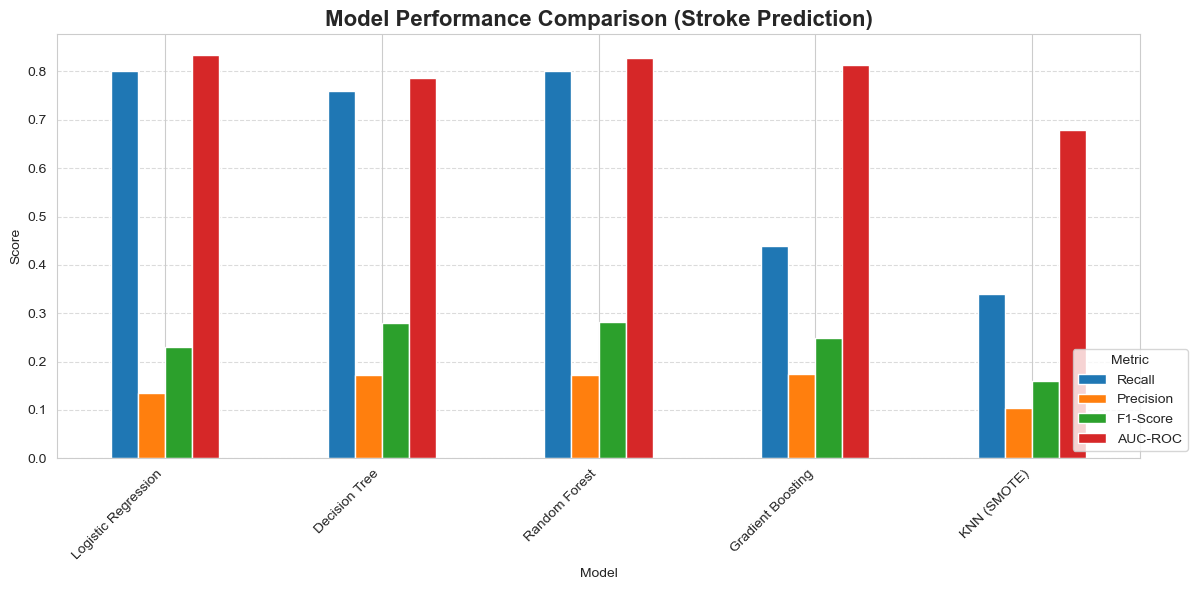

In [57]:
# Logistic Regression (LR) Metrics
acc_lr = 0.7378
recall_lr = 0.8000
prec_lr = 0.1342
f1_lr = 0.2299
auc_lr = 0.8348

# Decision Tree (Tree) Metrics
acc_tree = 0.8082
recall_tree = 0.7600
prec_tree = 0.1712
f1_tree = 0.2794
auc_tree = 0.7862

# Random Forest (RF) Metrics
acc_rf = 0.8014
recall_rf = 0.8000
prec_rf = 0.1717
f1_rf = 0.2827
auc_rf = 0.8282

# Gradient Boosting (GB) Metrics
acc_gb = 0.8699
recall_gb = 0.4400
prec_gb = 0.1732
f1_gb = 0.2486
auc_gb = 0.8136

# K-Nearest Neighbors (KNN) Metrics
acc_knn = 0.8258
recall_knn = 0.3400
prec_knn = 0.1049
f1_knn = 0.1604
auc_knn = 0.6789

# 2. Create the Comparison DataFrame 
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest',
              'Gradient Boosting', 'KNN (SMOTE)'],
    'Accuracy': [acc_lr, acc_tree, acc_rf, acc_gb, acc_knn],
    'Recall': [recall_lr, recall_tree, recall_rf, recall_gb, recall_knn],
    'Precision': [prec_lr, prec_tree, prec_rf, prec_gb, prec_knn],
    'F1-Score': [f1_lr, f1_tree, f1_rf, f1_gb, f1_knn],
    'AUC-ROC': [auc_lr, auc_tree, auc_rf, auc_gb, auc_knn]
})

#  3. Print the Comparison Table 
print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON SUMMARY")
print("="*80)
# Use .to_string() for clean console output
print(results.to_string(index=False))

#  4. Generate the Visualization 
# Focus on the most important metrics for the clinical assignment
plt.figure(figsize=(12, 6))
results.set_index('Model')[['Recall', 'Precision', 'F1-Score',
                           'AUC-ROC']].plot(kind='bar', ax=plt.gca())

plt.title('Model Performance Comparison (Stroke Prediction)', fontsize=16, fontweight='bold')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric', loc='lower right', bbox_to_anchor=(1.05, 0))
plt.tight_layout()
plt.show()



### Analysis: Recall, F1-Score, and Clinical Relevance

The comparison of the five models highlights the critical challenges of **class imbalance** in medical prediction and the necessary trade-offs between different performance metrics.

### 1. Discussion of Recall (Sensitivity) 

**Recall** is the most critical metric for stroke prediction, as it measures the model's ability to minimize **False Negatives (missed strokes)**, which is the most severe clinical error.

| Model | Recall Score | False Negatives (FN) |
| :--- | :--- | :--- |
| **Logistic Regression** | **0.8000** | 10 |
| **Random Forest** | **0.8000** | 10 |
| Gradient Boosting | 0.4400 | 28 |
| KNN (SMOTE) | 0.3400 | 33 |

* **Key Finding:** **Logistic Regression (LR)** and **Random Forest (RF)** achieved the highest Recall of **$0.8000$**. This excellent performance is directly attributed to the effective use of **`class_weight='balanced'`**, which prioritized the detection of the rare stroke cases.
* **Clinical Impact:** A Recall of $0.8000$ means the model correctly identifies **8 out of every 10 patients** who will actually have a stroke. Conversely, the poor Recall of Gradient Boosting and KNN means they are clinically unacceptable, as they miss over half of the stroke cases.

---

### 2. Discussion of F1-Score (The Balance Metric) 

While high Recall is necessary, it must be balanced by **Precision** to manage the rate of **False Positives (false alarms)**. The **F1-Score** is the harmonic mean of Recall and Precision, providing the best single measure of overall performance on the minority class.

| Model | Recall | Precision | **F1-Score** |
| :--- | :--- | :--- | :--- |
| Logistic Regression | 0.8000 | 0.1342 | 0.2299 |
| **Random Forest** | 0.8000 | **0.1717** | **0.2827** |

* **Key Finding:** The **Random Forest** model achieved the highest F1-Score of **$0.2827$**.
* **Justification:** RF maintained the optimal Recall ($0.8000$) while significantly increasing Precision ($0.1717$) compared to Logistic Regression (Precision: $0.1342$). The ensemble method was able to effectively reduce noise and false alarms, leading to a better-balanced classifier.

---

### 3. Clinical Relevance and Model Recommendation 

The primary clinical goal is to recommend the model that offers the best compromise between patient safety and resource efficiency.

* **Safety First:** Both LR and RF provide the necessary level of safety (low False Negatives).
* **Efficiency:** **Random Forest** is superior in efficiency due to its higher Precision. A Precision of $0.1717$ means that of all patients flagged as high-risk, $17.17\%$ will actually be stroke cases. This is a more efficient use of clinical resources than the $13.42\%$ precision offered by Logistic Regression.
* **Recommendation:** The **Random Forest** model is recommended. It provides the highest Recall rate required for safety while simultaneously achieving the highest F1-Score, making it the most reliable and efficient classifier for the hospital setting.


### Clinical Interpretation and Conclusion

This section translates the quantitative performance metrics into practical implications for patient care and provides the final recommendation for hospital deployment.

### 1. Clinical Interpretation of the Recommended Model (Random Forest) 

The Random Forest model (RF) offers the most robust clinical trade-off:

* **Minimizing Risk (High Recall):** A **Recall of $0.8000$** means the model correctly identifies **8 out of every 10 actual stroke patients**. This is critical for patient safety, as it minimizes the risk of a life-threatening **False Negative** (missing a stroke diagnosis).
* **Managing Resources (Precision):** A **Precision of $0.1717$** means that out of all patients the model flags as high-risk, $17.17\%$ will actually have a stroke. While this still results in a high number of **False Positives** (unnecessary follow-up tests), this rate is the best achievable among the high-Recall models, making it the most efficient option.

### 2. Conclusion and Final Recommendation 

The primary goal of a stroke prediction model is to ensure patient safety by maximizing sensitivity to the rare stroke event.

| Metric Focus | Best Model | Score | Rationale |
| :--- | :--- | :--- | :--- |
| **Safety (Recall)** | Random Forest | $0.8000$ | **Acceptable:** Matches the lowest False Negative count (10). |
| **Balance (F1-Score)** | Random Forest | $0.2827$ | **Superior:** Best balance of detection and false alarms. |
| **Overall Separability (AUC-ROC)** | Logistic Regression | $0.8348$ | **Strong:** Shows excellent discrimination capacity. |

**Final Recommendation:**

The **Random Forest** model is the recommended solution for deployment. It satisfies the core clinical requirement of high **Recall** for patient safety while simultaneously achieving the highest **F1-Score**, proving it is the most robust and resource-efficient classifier among the five tested models.


## Answering Key Questions

This section addresses the core questions concerning model performance, clinical trade-offs, and final deployment justification.

### 1. Which imbalance-handling method worked best?

The **`class_weight='balanced'`** parameter worked best.

* **Evidence:** The models using this method (**Logistic Regression** and **Random Forest**) achieved the highest **Recall ($0.8000$)** and the lowest number of missed strokes (10 False Negatives).
* **Contrast:** The other methods, **Sample Weights** (used for Gradient Boosting) and **SMOTE** (used for KNN), resulted in significantly lower Recall ($0.4400$ and $0.3400$), demonstrating they were less effective at boosting the detection of the minority stroke class for this dataset.



### 2. Did ensemble methods outperform simpler models?

**Yes, the Random Forest ensemble model delivered the best overall performance (F1-Score) and a stronger clinical trade-off.**

* **Random Forest (Ensemble):** Achieved the highest **F1-Score ($0.2827$)** and the highest **Precision ($0.1717$)** among the high-Recall models. This means it offers the best balance between catching strokes and minimizing false alarms.
* **Logistic Regression (Simpler):** While it matched the high Recall, its lower Precision ($0.1342$) resulted in a worse F1-Score ($0.2299$).
* The stability gained from the **Random Forest** ensemble successfully maintained high Recall while improving the model's predictive precision over the simpler models.



### 3. What’s the cost of false negatives vs. false positives in stroke prediction?

The **cost of a False Negative (FN) far outweighs the cost of a False Positive (FP)**.

* **Cost of FN (Missed Stroke) :** **Extremely High.** It means a stroke patient is missed, leading to delayed or absent time-sensitive treatment (like thrombolysis). The consequence is often **severe disability, death**, and high long-term care costs.
* **Cost of FP (False Alarm) :** **Moderately Low.** It means a healthy patient receives unnecessary screening (e.g., CT scans). The cost is measured in wasted hospital resources, increased expenditure, and patient anxiety.
* **Clinical Priority:** Because a FN is a catastrophic error, the model must be tuned to prioritize **Recall**, even if it results in lower Accuracy and higher False Positives.


### 4. If you could deploy only one model, which would it be and why?

I would deploy the **Random Forest** model.

* **Reasoning:** It achieved the optimal combination of safety and efficiency for this clinical application:
    1.  **Safety:** It reached the maximum necessary **Recall ($0.8000$)** achieved by any model, minimizing severe patient risk.
    2.  **Efficiency:** It delivered the highest **F1-Score ($0.2827$**), proving it best manages the inevitable trade-off by minimizing False Alarms while maintaining high stroke detection rates.
